Evolved adversary images 

0.98 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 


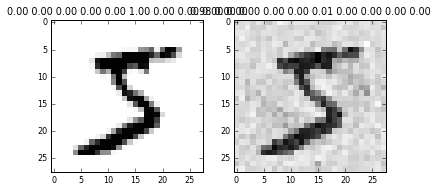

1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 


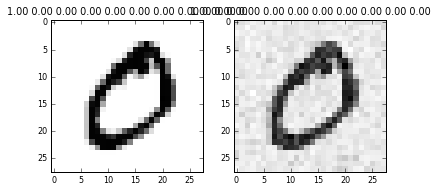

0.96 0.00 0.01 0.00 0.02 0.00 0.00 0.01 0.00 0.01 


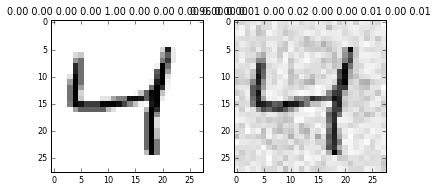

0.96 0.02 0.01 0.00 0.00 0.00 0.00 0.00 0.01 0.00 


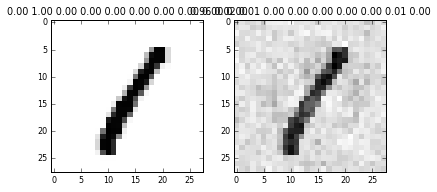

0.94 0.00 0.00 0.00 0.00 0.01 0.00 0.01 0.02 0.01 


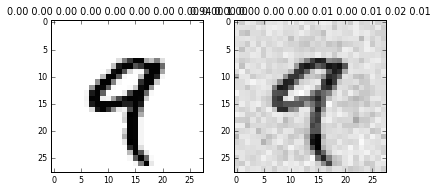

0.97 0.00 0.02 0.00 0.00 0.00 0.00 0.00 0.01 0.00 


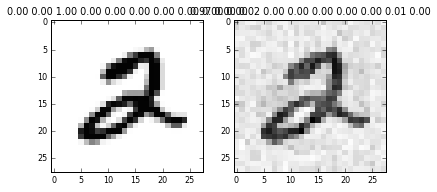

0.92 0.02 0.01 0.00 0.00 0.01 0.01 0.00 0.02 0.00 


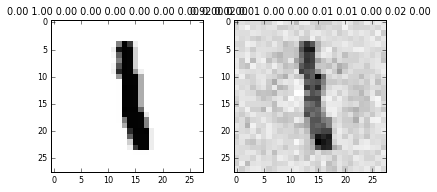

0.96 0.00 0.01 0.01 0.00 0.00 0.00 0.00 0.01 0.01 


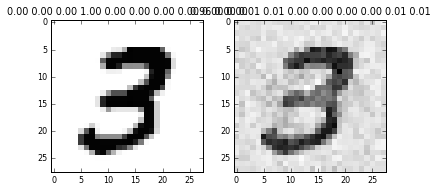

0.94 0.01 0.01 0.00 0.00 0.02 0.01 0.00 0.01 0.00 


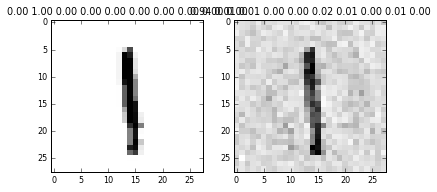

0.98 0.00 0.00 0.00 0.02 0.00 0.00 0.00 0.00 0.00 


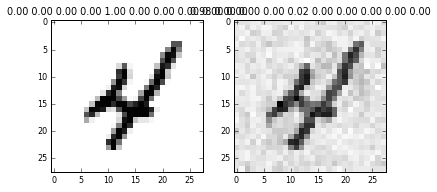

In [5]:
%matplotlib inline 
import numpy as np
from keras.models import model_from_json 
from keras.datasets import mnist 
import matplotlib.pyplot as plot
from matplotlib import rcParams


def probs_to_string(prob):
    # Pretty print vector of probabilities to string.
    res = ""
    for p in prob:
        res += "%.2f " % p 
    return res


# Load saved individuals. 
X = np.load("adversary_inputs_matrix.npy")

#  Load trained MLP. 
model = model_from_json(open("mlp.json").read()) 
model.load_weights("mlp_weights.h5")

# Load mnist data set. 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32') 
X_train /= 255 

#plot.figure(figsize=(8.27,11.69))
plot.figure(1)
rcParams.update({'font.size': 8})
#f, pltarr = plot.subplots(5,2)

# For each image print prediction and show image.
for i in range(0,10):
    
    res = model.predict(np.array([X[i]]))
    print(probs_to_string(res[0])) 
        
    x = X[i].reshape(28,28)
    plot.subplot(122)
    plot.imshow(x, interpolation="none", cmap=plot.cm.Greys)
    #plot.title(probs_to_string(res[0]))

    filename = "ga_%s.eps" % i
    #plot.savefig(filename, orientation = 'portrait')
    # plot.show() 

    train = X_train[i].reshape(28, 28)
    plot.subplot(121)
    plot.imshow(train, interpolation="none", cmap=plot.cm.Greys)

    res = model.predict(np.array([X_train[i]]))
    #plot.title(probs_to_string(res[0]))

    filename = "train_%s.eps" % i
    #plot.savefig(filename, orientation = 'portrait')
    plot.show()
